<a href="https://colab.research.google.com/github/TabasomJebreili/Nobel-prize-analysis/blob/main/Nobel_Prize_Analysis_(start).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction

This project explores trends and patterns in the Nobel Prize dataset, analyzing laureates across categories such as Physics, Chemistry, Peace, Literature, Medicine, and Economics.
We aim to uncover insights about the distribution of awards over time, gender and nationality of winners, and broader global patterns reflected through Nobel history.

In [ ]:
#%pip install --upgrade plotly

In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
pd.options.display.float_format = '{:,.2f}'.format

### Read the Data

In [ ]:
df_data = pd.read_csv('nobel_prize_data.csv')

# Data Exploration & Cleaning


In [ ]:
df_data.shape

(962, 16)

In [ ]:
df_data.sample()

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO
748,2003,Chemistry,The Nobel Prize in Chemistry 2003,"""for discoveries concerning channels in cell m...",1/2,Individual,Roderick MacKinnon,1956-02-19,"Burlington, MA",United States of America,United States of America,Male,Rockefeller University,"New York, NY",United States of America,USA


In [ ]:
df_data.sort_values("year", ascending=False)

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO
961,2020,Physics,The Nobel Prize in Physics 2020,“for the discovery that black hole formation i...,1/2,Individual,Roger Penrose,1931-08-08,Colchester,United Kingdom,United Kingdom,Male,University of Oxford,Oxford,United Kingdom,GBR
959,2020,Physics,The Nobel Prize in Physics 2020,“for the discovery of a supermassive compact o...,1/4,Individual,Andrea Ghez,1965-06-16,"New York, NY",United States of America,United States of America,Female,University of California,"Berkeley, CA",United States of America,USA
952,2020,Economics,The Sveriges Riksbank Prize in Economic Scienc...,“for improvements to auction theory and invent...,1/2,Individual,Paul R. Milgrom,1948-04-20,"Detroit, MI",United States of America,United States of America,Male,Stanford University,"Stanford, CA",United States of America,USA
950,2020,Chemistry,The Nobel Prize in Chemistry 2020,“for the development of a method for genome ed...,1/2,Individual,Emmanuelle Charpentier,1968-12-11,Juvisy-sur-Orge,France,France,Female,Max-Planck-Institut,Berlin,Germany,FRA
951,2020,Chemistry,The Nobel Prize in Chemistry 2020,“for the development of a method for genome ed...,1/2,Individual,Jennifer A. Doudna,1964-02-19,"Washington, DC",United States of America,United States of America,Female,University of California,"Berkeley, CA",United States of America,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,1901,Physics,The Nobel Prize in Physics 1901,"""in recognition of the extraordinary services ...",1/1,Individual,Wilhelm Conrad Röntgen,1845-03-27,Lennep (Remscheid),Prussia (Germany),Germany,Male,Munich University,Munich,Germany,DEU
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Switzerland,Male,NaN,NaN,NaN,CHE
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Poland,Male,Marburg University,Marburg,Germany,POL
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Frédéric Passy,1822-05-20,Paris,France,France,Male,NaN,NaN,NaN,FRA


In [ ]:
df_data.isna().values.any()

np.True_

In [ ]:
df_data.isna().sum()

,0
year,0
category,0
prize,0
motivation,88
prize_share,0
laureate_type,0
full_name,0
birth_date,28
birth_city,31
birth_country,28


In [ ]:
df_data[df_data.birth_city.isna()]

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO
24,1904,Peace,The Nobel Peace Prize 1904,NaN,1/1,Organization,Institut de droit international (Institute of ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60,1910,Peace,The Nobel Peace Prize 1910,NaN,1/1,Organization,Bureau international permanent de la Paix (Per...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
89,1917,Peace,The Nobel Peace Prize 1917,NaN,1/1,Organization,Comité international de la Croix Rouge (Intern...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
200,1938,Peace,The Nobel Peace Prize 1938,NaN,1/1,Organization,Office international Nansen pour les Réfugiés ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
215,1944,Peace,The Nobel Peace Prize 1944,NaN,1/1,Organization,Comité international de la Croix Rouge (Intern...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
237,1947,Peace,The Nobel Peace Prize 1947,NaN,1/2,Organization,American Friends Service Committee (The Quakers),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
238,1947,Peace,The Nobel Peace Prize 1947,NaN,1/2,Organization,Friends Service Council (The Quakers),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
283,1954,Peace,The Nobel Peace Prize 1954,NaN,1/1,Organization,Office of the United Nations High Commissioner...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
348,1963,Peace,The Nobel Peace Prize 1963,NaN,1/2,Organization,Comité international de la Croix Rouge (Intern...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
349,1963,Peace,The Nobel Peace Prize 1963,NaN,1/2,Organization,Ligue des Sociétés de la Croix-Rouge (League o...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Type Conversions


In [ ]:
df_data.birth_date = pd.to_datetime(df_data.birth_date)

In [ ]:
df_data.sample()

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO
828,2009,Physics,The Nobel Prize in Physics 2009,"""for the invention of an imaging semiconductor...",1/4,Individual,Willard S. Boyle,1924-08-19,"Amherst, NS",Canada,Canada,Male,Bell Laboratories,"Murray Hill, NJ",United States of America,CAN


In [ ]:
type(df_data.prize_share[134])

str

#### Add a Column with the Prize Share as a Percentage

In [ ]:
new_df = df_data.prize_share.str.split("/" , expand=True)


In [ ]:
new_df[0] = pd.to_numeric(new_df[0])
new_df[1] = pd.to_numeric(new_df[1])

In [ ]:
df_data['share_pct'] = new_df[0] / new_df[1] * 100

In [ ]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   year                   962 non-null    int64         
 1   category               962 non-null    object        
 2   prize                  962 non-null    object        
 3   motivation             874 non-null    object        
 4   prize_share            962 non-null    object        
 5   laureate_type          962 non-null    object        
 6   full_name              962 non-null    object        
 7   birth_date             934 non-null    datetime64[ns]
 8   birth_city             931 non-null    object        
 9   birth_country          934 non-null    object        
 10  birth_country_current  934 non-null    object        
 11  sex                    934 non-null    object        
 12  organization_name      707 non-null    object        
 13  organ

In [ ]:
df_data.tail()

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct
957,2020,Medicine,The Nobel Prize in Physiology or Medicine 2020,“for the discovery of Hepatitis C virus”,1/3,Individual,Michael Houghton,1949-07-02,NaN,United Kingdom,United Kingdom,Male,University of Alberta,Edmonton,Canada,GBR,33.33
958,2020,Peace,The Nobel Peace Prize 2020,"“for its efforts to combat hunger, for its con...",1/1,Organization,World Food Programme (WFP),NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.00
959,2020,Physics,The Nobel Prize in Physics 2020,“for the discovery of a supermassive compact o...,1/4,Individual,Andrea Ghez,1965-06-16,"New York, NY",United States of America,United States of America,Female,University of California,"Berkeley, CA",United States of America,USA,25.00
960,2020,Physics,The Nobel Prize in Physics 2020,“for the discovery of a supermassive compact o...,1/4,Individual,Reinhard Genzel,1952-03-24,Bad Homburg vor der Höhe,Germany,Germany,Male,University of California,"Los Angeles, CA",United States of America,DEU,25.00
961,2020,Physics,The Nobel Prize in Physics 2020,“for the discovery that black hole formation i...,1/2,Individual,Roger Penrose,1931-08-08,Colchester,United Kingdom,United Kingdom,Male,University of Oxford,Oxford,United Kingdom,GBR,50.00


# Plotly Donut Chart: Percentage of Male vs. Female Laureates

In [ ]:
gender_df = df_data.groupby('sex').count()

In [ ]:
gender_df

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,organization_name,organization_city,organization_country,ISO,share_pct
sex,,,,,,,,,,,,,,,,
Female,58,58,58,51,58,58,58,58,58,58,58,24,24,24,58,58
Male,876,876,876,811,876,876,876,876,873,876,876,683,683,684,876,876


In [ ]:
donut = px.pie(labels=gender_df.index, values=gender_df.prize, title='Percentage of Male vs. Female Laureates', names=gender_df.index, hole=0.6)

In [ ]:
donut.show()

# the first 3 Women to Win the Nobel Prize:


In [ ]:
df_data[df_data.sex == 'Female'].sort_values('year')[:3]

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct
18,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",1/4,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,Russian Empire (Poland),Poland,Female,NaN,NaN,NaN,POL,25.00
29,1905,Peace,The Nobel Peace Prize 1905,NaN,1/1,Individual,"Baroness Bertha Sophie Felicita von Suttner, n...",1843-06-09,Prague,Austrian Empire (Czech Republic),Czech Republic,Female,NaN,NaN,NaN,CZE,100.00
51,1909,Literature,The Nobel Prize in Literature 1909,"""in appreciation of the lofty idealism, vivid ...",1/1,Individual,Selma Ottilia Lovisa Lagerlöf,1858-11-20,Mårbacka,Sweden,Sweden,Female,NaN,NaN,NaN,SWE,100.00


# The Repeat Winners:


In [ ]:
df_data[df_data.duplicated(subset=['full_name'], keep=False)]

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct
18,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",1/4,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,Russian Empire (Poland),Poland,Female,NaN,NaN,NaN,POL,25.00
62,1911,Chemistry,The Nobel Prize in Chemistry 1911,"""in recognition of her services to the advance...",1/1,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,Russian Empire (Poland),Poland,Female,Sorbonne University,Paris,France,POL,100.00
89,1917,Peace,The Nobel Peace Prize 1917,NaN,1/1,Organization,Comité international de la Croix Rouge (Intern...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.00
215,1944,Peace,The Nobel Peace Prize 1944,NaN,1/1,Organization,Comité international de la Croix Rouge (Intern...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.00
278,1954,Chemistry,The Nobel Prize in Chemistry 1954,"""for his research into the nature of the chemi...",1/1,Individual,Linus Carl Pauling,1901-02-28,"Portland, OR",United States of America,United States of America,Male,California Institute of Technology (Caltech),"Pasadena, CA",United States of America,USA,100.00
283,1954,Peace,The Nobel Peace Prize 1954,NaN,1/1,Organization,Office of the United Nations High Commissioner...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.00
297,1956,Physics,The Nobel Prize in Physics 1956,"""for their researches on semiconductors and th...",1/3,Individual,John Bardeen,1908-05-23,"Madison, WI",United States of America,United States of America,Male,University of Illinois,"Urbana, IL",United States of America,USA,33.33
306,1958,Chemistry,The Nobel Prize in Chemistry 1958,"""for his work on the structure of proteins, es...",1/1,Individual,Frederick Sanger,1918-08-13,Rendcombe,United Kingdom,United Kingdom,Male,University of Cambridge,Cambridge,United Kingdom,GBR,100.00
340,1962,Peace,The Nobel Peace Prize 1962,NaN,1/1,Individual,Linus Carl Pauling,1901-02-28,"Portland, OR",United States of America,United States of America,Male,California Institute of Technology (Caltech),"Pasadena, CA",United States of America,USA,100.00
348,1963,Peace,The Nobel Peace Prize 1963,NaN,1/2,Organization,Comité international de la Croix Rouge (Intern...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.00


# Number of Prizes per Category


In [ ]:
category_df = df_data.groupby('category').count()

In [ ]:
bar = px.bar(x=category_df.index, y=category_df.prize)
bar.update_layout(xaxis_title = 'Categories', yaxis_title="Nomber of Prizes")
bar.show()

The first prize in the field of Economics:


In [ ]:
df_data[df_data.category == 'Economics'].sort_values('year')[:2]

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct
393,1969,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for having developed and applied dynamic mode...",1/2,Individual,Jan Tinbergen,1903-04-12,the Hague,Netherlands,Netherlands,Male,The Netherlands School of Economics,Rotterdam,Netherlands,NLD,50.00
394,1969,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for having developed and applied dynamic mode...",1/2,Individual,Ragnar Frisch,1895-03-03,Oslo,Norway,Norway,Male,University of Oslo,Oslo,Norway,NOR,50.00


# Male and Female Winners by Category

In [ ]:
df_data.sample(5)

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct
706,2000,Chemistry,The Nobel Prize in Chemistry 2000,"""for the discovery and development of conducti...",1/3,Individual,Alan G. MacDiarmid,1927-04-14,Masterton,New Zealand,New Zealand,Male,University of Pennsylvania,"Philadelphia, PA",United States of America,NZL,33.33
402,1970,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for the scientific work through which he has ...",1/1,Individual,Paul A. Samuelson,1915-05-15,"Gary, IN",United States of America,United States of America,Male,Massachusetts Institute of Technology (MIT),"Cambridge, MA",United States of America,USA,100.00
739,2002,Literature,The Nobel Prize in Literature 2002,"""for writing that upholds the fragile experien...",1/1,Individual,Imre Kertész,1929-11-09,Budapest,Hungary,Hungary,Male,NaN,NaN,NaN,HUN,100.00
20,1904,Chemistry,The Nobel Prize in Chemistry 1904,"""in recognition of his services in the discove...",1/1,Individual,Sir William Ramsay,1852-10-02,Glasgow,Scotland,United Kingdom,Male,University College London,London,United Kingdom,GBR,100.00
289,1955,Physics,The Nobel Prize in Physics 1955,"""for his precision determination of the magnet...",1/2,Individual,Polykarp Kusch,1911-01-26,Blankenburg,Germany,Germany,Male,Columbia University,"New York, NY",United States of America,DEU,50.00


In [ ]:
gender_category_df = df_data.groupby(['category','sex'], as_index=False).agg({
    'prize': 'count'})

In [ ]:
gender_category_df.sort_values('prize', ascending=False, inplace=True)

In [ ]:
gender_bar = px.bar(x=gender_category_df.category, y=gender_category_df.prize, color=gender_category_df.sex, title='Number of Prizes Awarded per Category split by Men and Women')
gender_bar.update_layout(xaxis_title='Category', yaxis_title='Number of Prizes')
gender_bar.show()

# Number of Prizes Awarded Over Time

In [1]:
prizes_per_year_df = df_data.groupby('year').agg({
    'prize': 'count'
})

NameError: name 'df_data' is not defined

In [ ]:
prizes_per_year_df

,prize
year,
1901,6
1902,7
1903,7
1904,6
1905,5
...,...
2016,11
2017,12
2018,13


In [ ]:
roll_df = prizes_per_year_df.rolling(window=5).mean()

([<matplotlib.axis.XTick at 0x7de69e1a4e00>,
 [Text(1900, 0, '1900'),
  Text(1905, 0, '1905'),
  Text(1910, 0, '1910'),
  Text(1915, 0, '1915'),
  Text(1920, 0, '1920'),
  Text(1925, 0, '1925'),
  Text(1930, 0, '1930'),
  Text(1935, 0, '1935'),
  Text(1940, 0, '1940'),
  Text(1945, 0, '1945'),
  Text(1950, 0, '1950'),
  Text(1955, 0, '1955'),
  Text(1960, 0, '1960'),
  Text(1965, 0, '1965'),
  Text(1970, 0, '1970'),
  Text(1975, 0, '1975'),
  Text(1980, 0, '1980'),
  Text(1985, 0, '1985'),
  Text(1990, 0, '1990'),
  Text(1995, 0, '1995'),
  Text(2000, 0, '2000'),
  Text(2005, 0, '2005'),
  Text(2010, 0, '2010'),
  Text(2015, 0, '2015')])

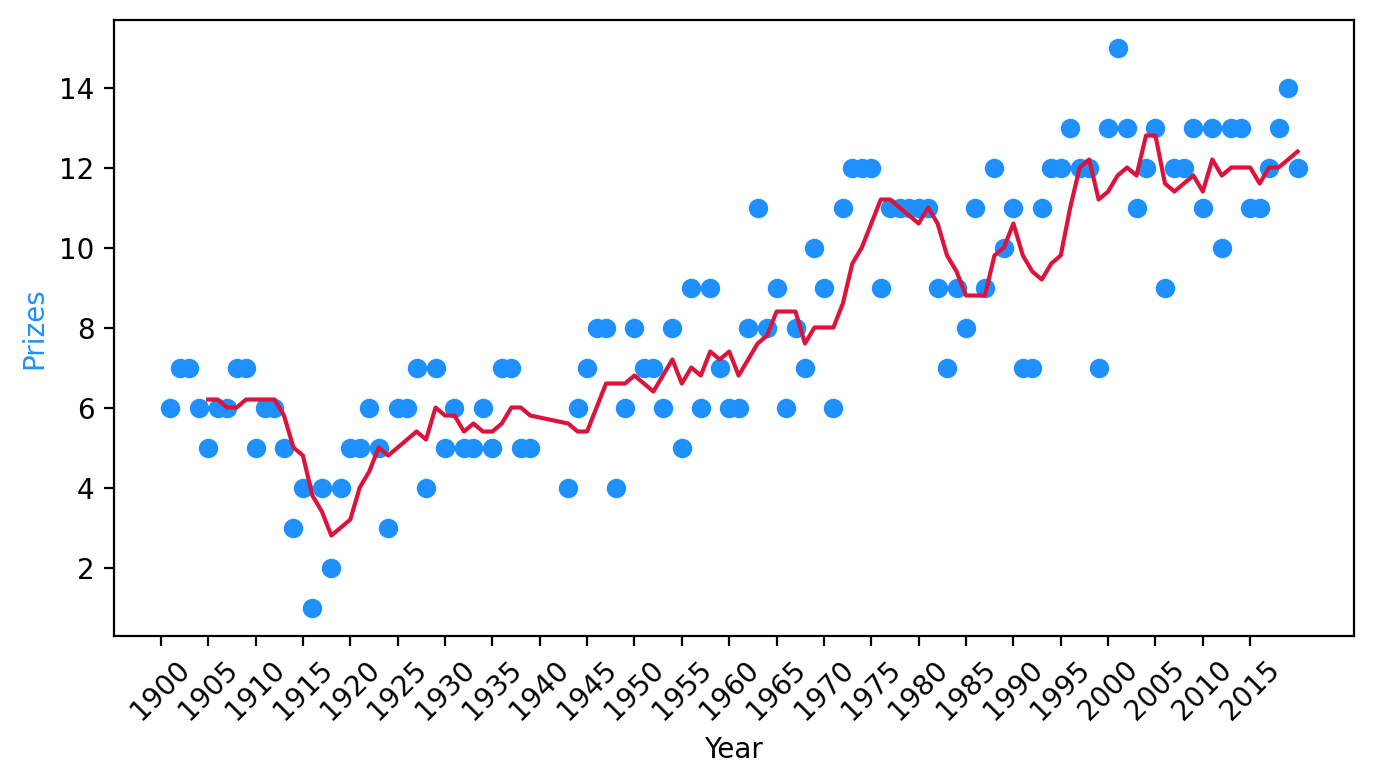

In [ ]:
plt.figure(figsize=(8,4), dpi=200)
plt.scatter(prizes_per_year_df.index, prizes_per_year_df.prize, color='dodgerblue')
plt.plot(prizes_per_year_df.index, roll_df.prize, color='crimson')
plt.xlabel('Year')
plt.ylabel('Prizes', color='dodgerblue')
plt.xticks(np.arange(1900, 2020 , 5), rotation=45)

# Are More Prizes Shared Than Before?


In [ ]:
average_price_share = df_data.groupby('year').agg({
    'share_pct':'mean'
})

In [ ]:
average_price_share

,share_pct
year,
1901,83.33
1902,71.43
1903,71.43
1904,83.33
1905,100.00
...,...
2016,54.55
2017,50.00
2018,46.15


In [ ]:
roll_average_prize = average_price_share.rolling(window=5).mean()

In [ ]:
roll_average_prize

,share_pct
year,
1901,NaN
1902,NaN
1903,NaN
1904,NaN
1905,81.90
...,...
2016,52.28
2017,50.28
2018,50.28


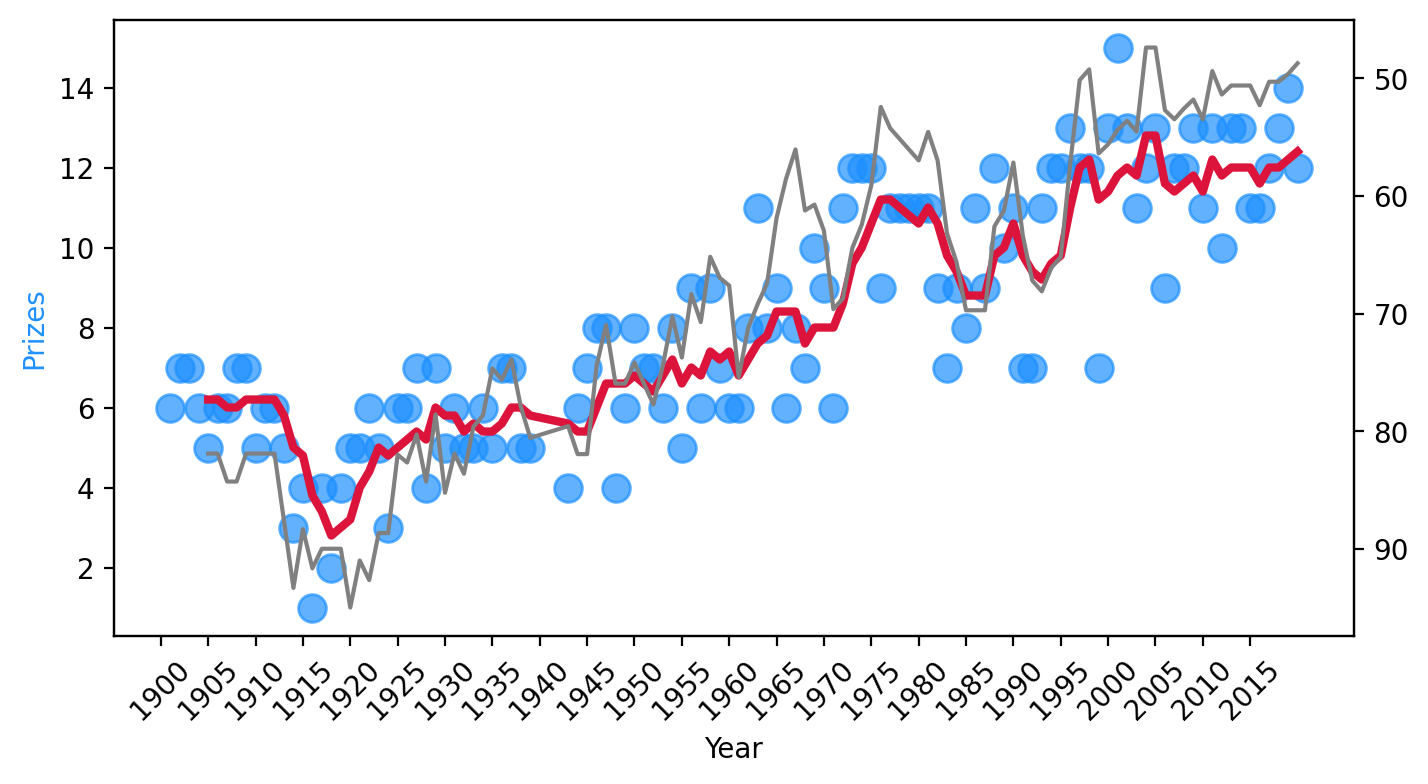

In [ ]:
plt.figure(figsize=(8,4), dpi=200)
plt.xticks(np.arange(1900, 2020 , 5), rotation=45)
ax1 = plt.gca()
ax2 = ax1.twinx()
ax2.invert_yaxis()
ax1.scatter(x=prizes_per_year_df.index,
           y=prizes_per_year_df.values,
           c='dodgerblue',
           alpha=0.7,
           s=100,)

ax1.plot(prizes_per_year_df.index,
        roll_df.values,
        c='crimson',
        linewidth=3,)
ax1.set_xlabel('Year')
ax1.set_ylabel('Prizes', color='dodgerblue')

ax2.plot(prizes_per_year_df.index, roll_average_prize.share_pct, color="gray")

# The Countries with the Most Nobel Prizes

In [ ]:
top_countries = df_data.groupby(['birth_country_current', 'ISO'], as_index=False).agg({
    'prize':'count'
})

In [ ]:
top_countries.sort_values('prize', inplace=True)

In [ ]:
top20_countries = top_countries[-20:]

In [ ]:
hor_bar = px.bar(x=top20_countries.prize, y=top20_countries.birth_country_current, orientation='h', title='Top 20 Countries by Number of Prizes', color=top20_countries.prize, color_continuous_scale='Viridis')

In [ ]:
hor_bar.update_layout(xaxis_title='Number of Prizes', yaxis_title='Country', coloraxis_showscale=False)

# Choropleth Map to Show the Number of Prizes Won by Country



In [ ]:
choropleth = px.choropleth(top_countries,
                           locations='ISO',
                           color='prize',
                           color_continuous_scale=px.colors.sequential.matter)

In [ ]:
choropleth

## Prize Categories by Country

Analyze which Nobel categories contribute most to the total prizes won by each country.

We group the data by country and category to visualize category distribution per nation and compare patterns across major prize-winning countries.


In [ ]:
cat_prize_country = df_data.groupby(['birth_country_current','category'], as_index=False).agg(
    cat_prize=('prize','count'),
)

In [ ]:
total_prize_df = df_data.groupby('birth_country_current',as_index=False).agg(
    total_prize=('prize', 'count')
)


In [ ]:
merged_df = pd.merge(cat_prize_country, total_prize_df, on="birth_country_current")

In [ ]:
merged_df.sort_values("total_prize", inplace=True)

In [ ]:
cat_country_bar = px.bar(x=merged_df.cat_prize, y=merged_df.birth_country_current, color=merged_df.category, orientation='h')

In [ ]:
cat_country_bar.update_layout(xaxis_title='Prizes', yaxis_title='Category', yaxis={"categoryorder":'total ascending'}, coloraxis_showscale=False)

### Number of Prizes Won by Each Country Over Time

In [ ]:
year_country_df = df_data.groupby(by=["year","birth_country_current"], as_index=False).agg({"prize":"count"})

In [ ]:
year_country_df.sort_values("year", inplace=True)

In [ ]:
cumulative_prizes = year_country_df.groupby(["birth_country_current", "year"]).sum().groupby(level=[0]).cumsum()

In [ ]:
cumulative_prizes.reset_index(inplace=True)

In [ ]:
cumulative_prizes

,birth_country_current,year,prize
0,Algeria,1957,1
1,Algeria,1997,2
2,Argentina,1936,1
3,Argentina,1947,2
4,Argentina,1980,3
...,...,...,...
622,United States of America,2020,281
623,Venezuela,1980,1
624,Vietnam,1973,1
625,Yemen,2011,1


In [ ]:
line_chart = px.line(cumulative_prizes, x='year', y='prize', color='birth_country_current', hover_name="birth_country_current")

In [ ]:
line_chart

# The Top Research Organisations:


In [ ]:
institutions_all = df_data.groupby("organization_name", as_index=False).agg({
    "prize":"count"
})
institutions_all.sort_values("prize", inplace=True)
institutions = institutions_all[-20:]

In [ ]:
institutions_bar = px.bar(institutions, x ="prize", y='organization_name', color='prize', color_continuous_scale=px.colors.sequential.haline, orientation='h')
institutions_bar.update_layout(xaxis_title= "Number of Prizes", yaxis_title="Institution", coloraxis_showscale=False)

# Which Cities Make the Most Discoveries?

In [ ]:
df_data.sample()

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct
772,2005,Chemistry,The Nobel Prize in Chemistry 2005,"""for the development of the metathesis method ...",1/3,Individual,Yves Chauvin,1930-10-10,Menin,Belgium,Belgium,Male,Institut Français du Pétrole,Rueil-Malmaison,France,BEL,33.33


In [ ]:
organization_city = df_data.groupby("organization_city").agg({"prize":"count"})

In [ ]:
organization_city.sort_values("prize", inplace=True)
top20_cities = organization_city[-20:]

In [ ]:
top20_cities

,prize
organization_city,
"Ithaca, NY",8
Göttingen,8
Heidelberg,9
"Boston, MA",9
"New Haven, CT",9
Munich,9
Moscow,10
Stockholm,10
Berlin,12


In [ ]:
city_bar = px.bar(top20_cities, x="prize", y=top20_cities.index, color="prize", orientation="h")
city_bar.show()

# Where are Nobel Laureates Born?


In [ ]:
birth_cities = df_data.groupby("birth_city", as_index=False).agg({"prize":"count"})
birth_cities.sort_values("prize", inplace=True)
top20_birth_cities = birth_cities[-20:]

In [ ]:
birth_cities_bar = px.bar(top20_birth_cities, x='prize', y="birth_city", color="prize", color_continuous_scale='Plasma')
birth_cities_bar.update_layout(coloraxis_showscale=False)

## Sunburst Chart: Country → City → Organisation

In [ ]:
organization = df_data.groupby(['organization_country',
                                       'organization_city',
                                       'organization_name'], as_index=False).agg({"prize":"count"})

In [ ]:
sunburst = px.sunburst(organization, path=['organization_country',
                                       'organization_city',
                                       'organization_name'], values='prize', color='organization_country')

In [ ]:
sunburst

# Patterns in the Laureate Age at the Time of the Award

How Old Are the Laureates When the Win the Prize?



In [ ]:
df_data.sample()

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct,winning_age
146,1929,Literature,The Nobel Prize in Literature 1929,"""principally for his great novel, <I>Buddenbro...",1/1,Individual,Thomas Mann,1875-06-06,Lübeck,Germany,Germany,Male,NaN,NaN,NaN,DEU,100.00,54.00


In [ ]:
df_data["winning_age"] = df_data.year-df_data.birth_date.dt.year

### Who were the oldest and youngest winners?


In [ ]:
df_data[df_data.winning_age == df_data.winning_age.max()]

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct,winning_age
937,2019,Chemistry,The Nobel Prize in Chemistry 2019,“for the development of lithium-ion batteries”,1/3,Individual,John Goodenough,1922-07-25,Jena,Germany,Germany,Male,University of Texas,Austin TX,United States of America,DEU,33.33,97.00


In [ ]:
df_data[df_data.winning_age == df_data.winning_age.min()]

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct,winning_age
885,2014,Peace,The Nobel Peace Prize 2014,"""for their struggle against the suppression of...",1/2,Individual,Malala Yousafzai,1997-07-12,Mingora,Pakistan,Pakistan,Female,NaN,NaN,NaN,PAK,50.00,17.00


In [ ]:
df_data.winning_age.describe()

,winning_age
count,934.00
mean,59.95
std,12.62
min,17.00
25%,51.00
50%,60.00
75%,69.00
max,97.00


<Axes: xlabel='winning_age', ylabel='Count'>

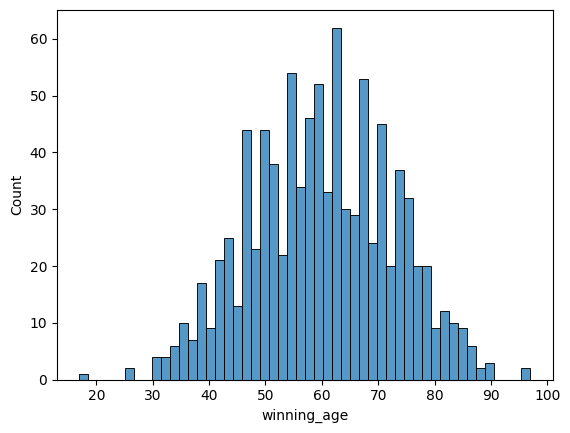

In [ ]:
sns.histplot(df_data, x="winning_age", bins=50)

### Age at Time of Award throughout History


<Axes: xlabel='year', ylabel='winning_age'>

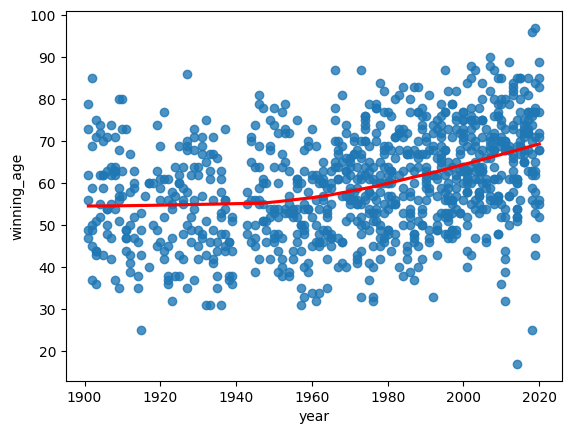

In [ ]:
sns.regplot(df_data, x="year", y="winning_age", lowess=True, line_kws={'color':'red'})

### Winning Age Across the Nobel Prize Categories

<Axes: xlabel='category', ylabel='winning_age'>

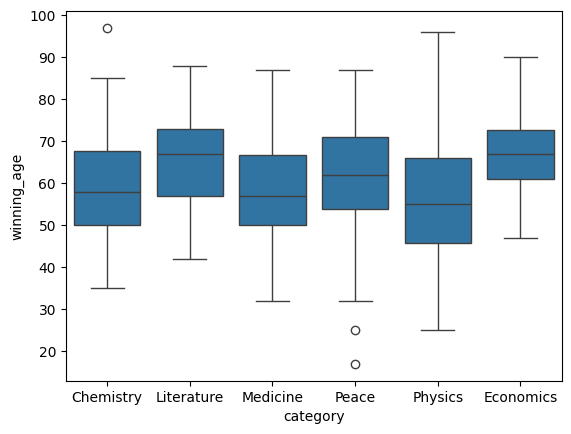

In [ ]:
sns.boxplot(df_data, x="category", y="winning_age")

## Age Trends by Prize Category


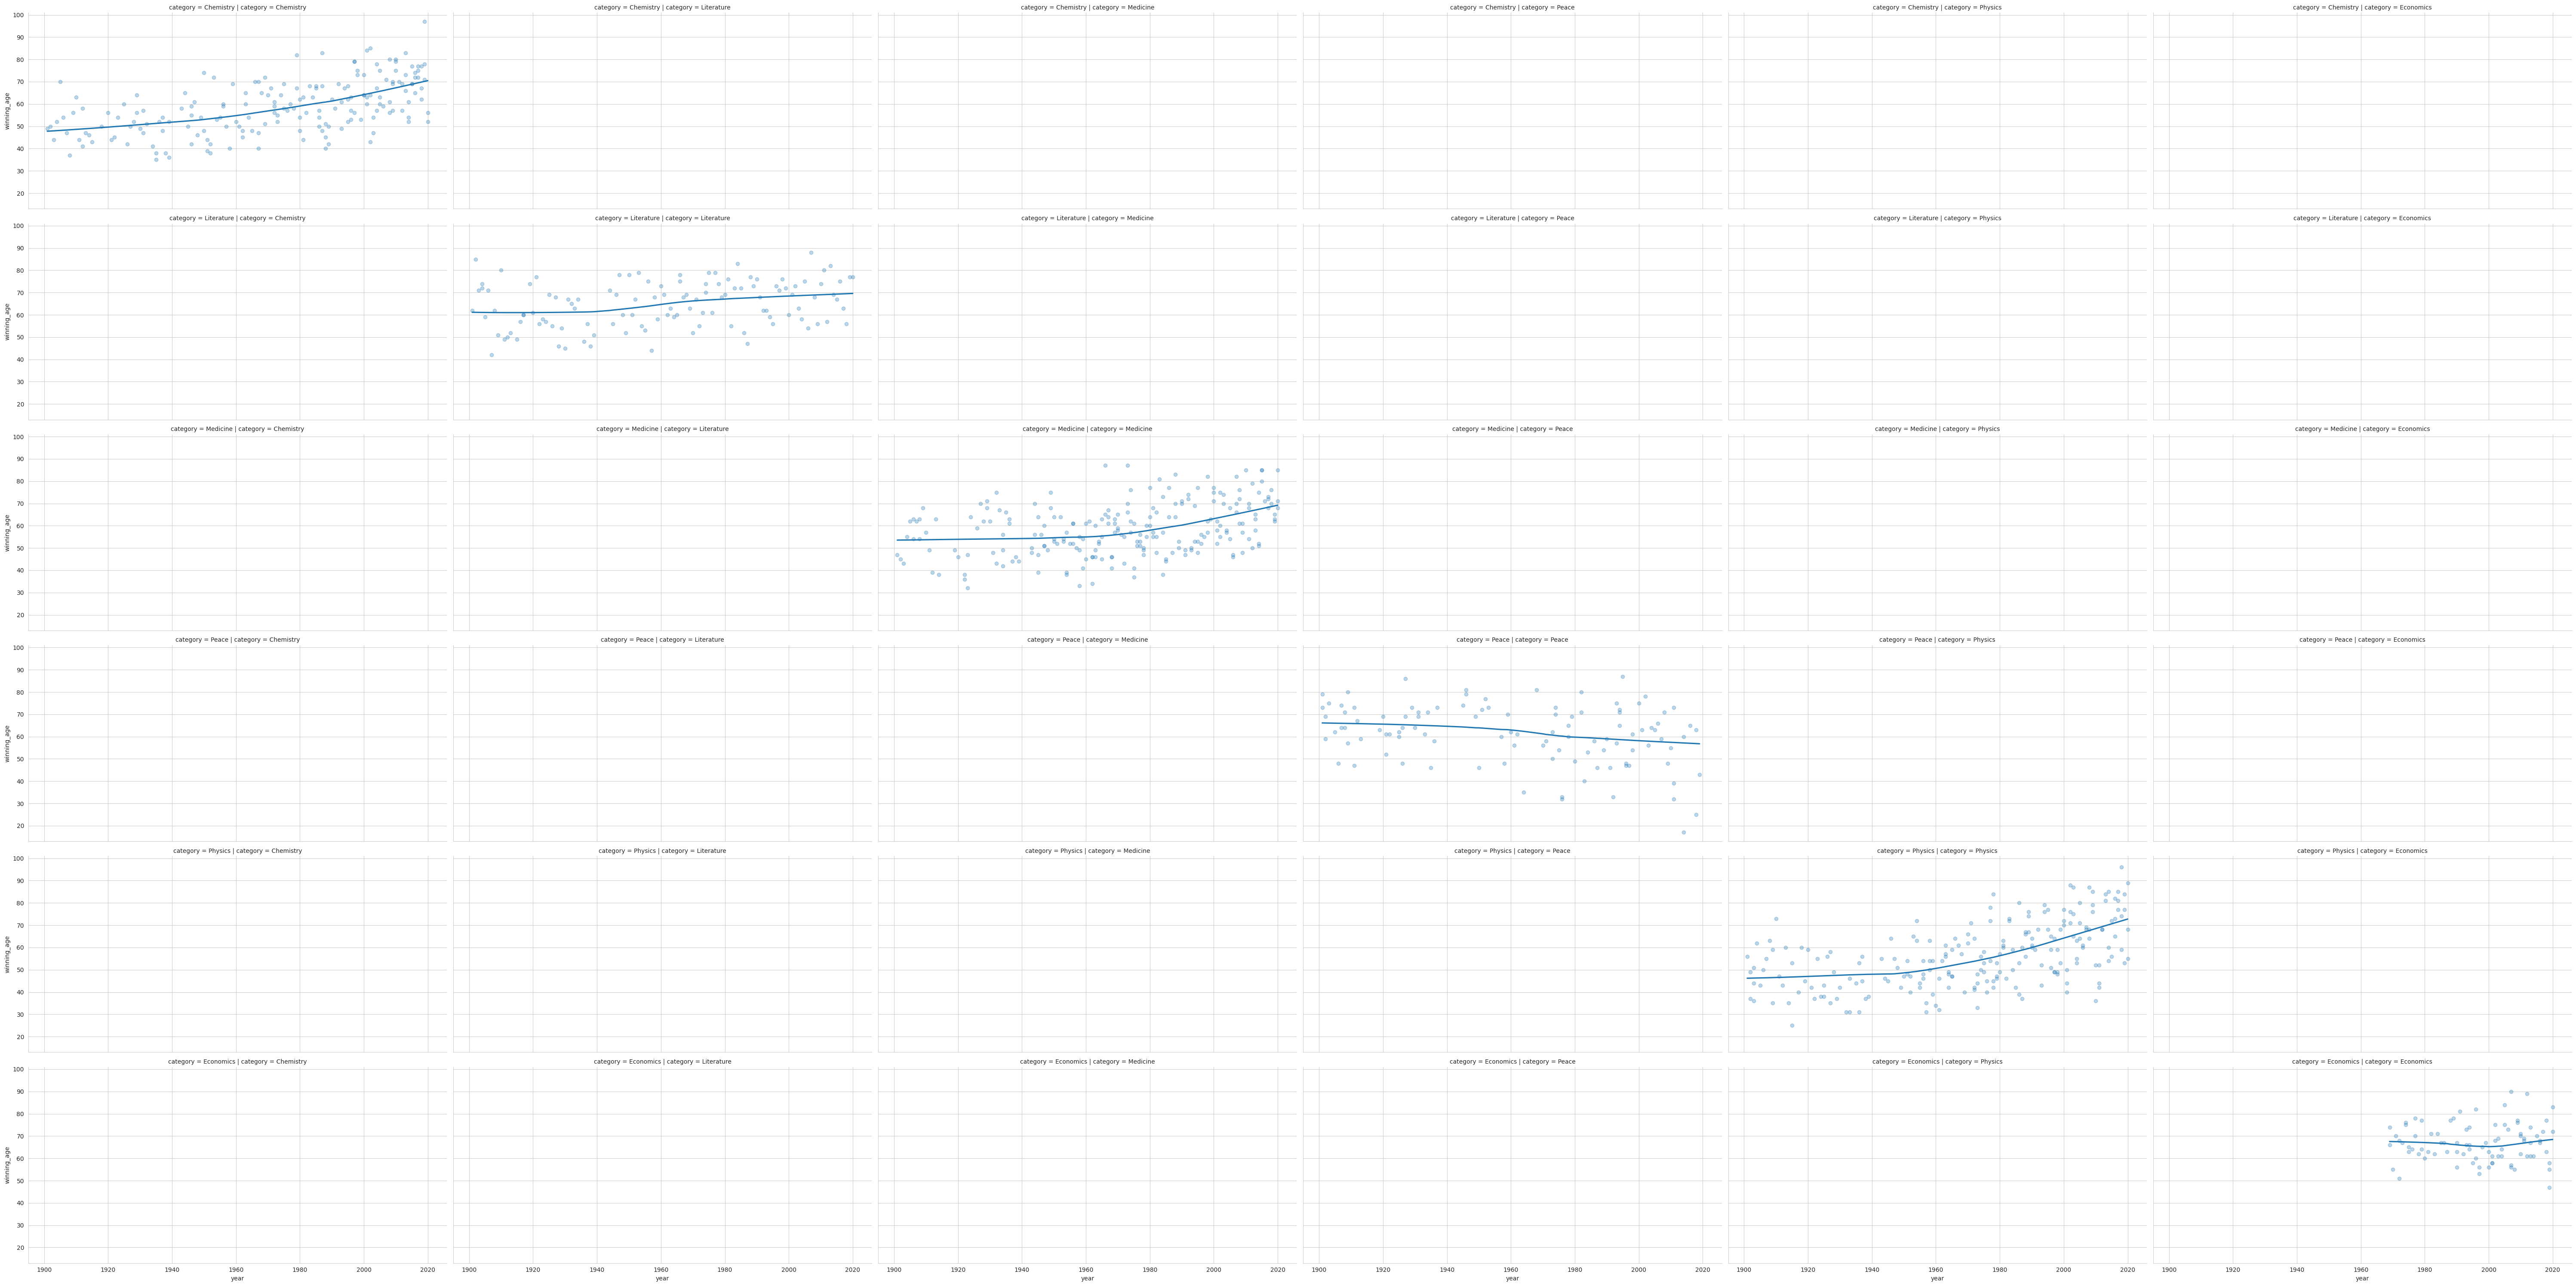

In [ ]:
with sns.axes_style('whitegrid'):
  sns.lmplot(df_data, x='year', y='winning_age',aspect=2, lowess=True, col="category", row='category', scatter_kws={"alpha":0.3})